# CONTRATICO Dataset Analysis

### **Overview**
This evaluation explores the behavior of AskQE using the CONTRATICO dataset, using both the evaluation metrics proposed in the paper and other introduced by us

**NOTE**: The following notebook has hardcoded paths for COLAB.


## 0. Setup

In [1]:
!git clone https://github.com/AlessandroMaini/CucumBERT_askqe.git

^C


Cloning into 'CucumBERT_askqe'...


In [ ]:
!pip install -q -r /content/CucumBERT_askqe/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 31.1 MB/s eta 0:00:00


## 1. CONTRATICO Dataset Analytics

We focus on understanding the main features of the CONTRATICO dataset, through useful insights.

In [ ]:
import json
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import random
import string

# Download necessary NLTK data (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def load_data(filepath):
    """Loads data from a .jsonl file."""
    data = []
    if not os.path.exists(filepath):
        print(f"Warning: File not found at {filepath}")
        return data
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from line: {line.strip()} - {e}")
    return data

def analyze_text_field(texts, field_name):
    """Analyzes a list of texts for word/token counts and sentence counts."""
    total_words = 0  # Words without punctuation
    total_tokens = 0 # Tokens including punctuation
    total_sentences = 0
    total_entries = len(texts)

    if not texts: # Handle empty list
        return {
            'average_words_per_entry': 0,
            'average_tokens_per_entry': 0,
            'average_sentences_per_entry': 0,
            'total_entries': 0
        }

    for text in texts:
        sentences = sent_tokenize(text)
        total_sentences += len(sentences)
        for sentence in sentences:
            # Tokenize the sentence
            tokens_in_sentence = word_tokenize(sentence)
            total_tokens += len(tokens_in_sentence)

            # Count words by filtering out punctuation from tokens
            words_in_sentence = [token for token in tokens_in_sentence if token not in string.punctuation]
            total_words += len(words_in_sentence)

    avg_words_per_entry = total_words / total_entries
    avg_tokens_per_entry = total_tokens / total_entries
    avg_sentences_per_entry = total_sentences / total_entries

    return {
        'average_words_per_entry': avg_words_per_entry,
        'average_tokens_per_entry': avg_tokens_per_entry,
        'average_sentences_per_entry': avg_sentences_per_entry,
        'total_entries': total_entries
    }

def print_random_samples(data, num_samples=3):
    """Prints random samples from the dataset."""
    if not data:
        print("No data available for sampling.")
        return

    print(f"\n--- Random Samples ({min(num_samples, len(data))} of {len(data)}) ---")
    samples = random.sample(data, min(num_samples, len(data)))
    for i, entry in enumerate(samples):
        print(f"\nSample {i+1}:")
        for key, value in entry.items():
            print(f"  {key}: {value}")


# Dataset paths
dataset_paths = {
    "en-es": "/content/CucumBERT_askqe/data/processed/en-es.jsonl", #
    "en-fr": "/content/CucumBERT_askqe/data/processed/en-fr.jsonl"
}

print("### Dataset Insights ###")

for name, path in dataset_paths.items():
    print(f"\nAnalyzing dataset: {name} ({path})")
    dataset = load_data(path)

    if not dataset:
        print(f"No data loaded for {name}. Skipping analysis.")
        continue

    src_lang = name.split('-')[0]
    target_lang = name.split('-')[1]

    original_texts = [entry[src_lang] for entry in dataset if src_lang in entry]
    mt_texts = [entry[target_lang] for entry in dataset if target_lang in entry]

    print("\n--- Original Text Statistics (English) ---")
    stats_original = analyze_text_field(original_texts, 'original_text')
    print(f"Total entries: {stats_original['total_entries']}")
    print(f"Average words per original entry: {stats_original['average_words_per_entry']:.2f}")
    print(f"Average tokens per original entry: {stats_original['average_tokens_per_entry']:.2f}")
    print(f"Average sentences per original entry: {stats_original['average_sentences_per_entry']:.2f}")

    print("\n--- Translation Statistics ---")
    stats_mt = analyze_text_field(mt_texts, 'machine_translation')
    print(f"Total entries: {stats_mt['total_entries']}")
    print(f"Average words per MT entry: {stats_mt['average_words_per_entry']:.2f}")
    print(f"Average tokens per MT entry: {stats_mt['average_tokens_per_entry']:.2f}")
    print(f"Average sentences per MT entry: {stats_mt['average_sentences_per_entry']:.2f}")

    # Print random samples
    print_random_samples(dataset, num_samples=3)

print("\n### Analysis Complete ###")

### Dataset Insights ###

Analyzing dataset: en-es (../data/processed/en-es.jsonl)

--- Original Text Statistics (English) ---
Total entries: 500
Average words per original entry: 22.93
Average tokens per original entry: 25.72
Average sentences per original entry: 1.00

--- Translation Statistics ---
Total entries: 500
Average words per MT entry: 27.69
Average tokens per MT entry: 30.56
Average sentences per MT entry: 1.07

--- Random Samples (3 of 500) ---

Sample 1:
  id: Wikipedia_handpicked_5:1902
  en: On 23 March, all Nigerian school were found to have been closed down by Nigerian government, markets as well as companies were closed down and children were forbidden by parents to step out of their homes.
  es: El 23 de marzo, se supo que el Gobierno de Nigeria había cerrado todas las escuelas, todos los mercados y las empresas estaban cerrados y los padres prohibieron a sus hijos salir de sus casas.

Sample 2:
  id: Wikisource_1:2056
  en: Pursuant to the authority under the Healt

## 2. CONTRATICO Dataset Evaluation

### 2.0 Question Generation Analysis

This analysis compares the **vanilla** and **atomic** question generation pipelines across the CONTRATICO dataset. The goals are:

1. **Quantify question generation diversity**: Measure how many questions each pipeline generates per entry on average
2. **Analyze fact-to-question mapping**: Understand the relationship between atomic facts and generated questions in the atomic pipeline
3. **Evaluate fact extraction quality**: Compare atomic facts with entailed facts (filtered for logical consistency)


The resulting visualizations help understand whether the atomic pipeline's decomposition strategy leads to more controlled, fact-grounded question generation compared to vanilla's more exploratory approach.


QUESTION GENERATION ANALYSIS — Pipeline Comparison

🔴 VANILLA Pipeline Questions:
   • Total entries: 500
   • Average questions per entry: 4.49
   • Min/Max: 1/10
   • Total questions: 2244

🔴 ATOMIC Pipeline Questions:
   • Total entries: 500
   • Average questions per entry: 3.08
   • Min/Max: 0/11
   • Total questions: 1540

🔵ATOMIC Facts (from atomic_facts.jsonl):
   • Total entries: 500
   • Average facts per entry: 3.04
   • Min/Max: 1/14
   • Total facts: 1521

🔵 ENTAILED Facts (from entailed_facts.jsonl):
   • Total entries: 500
   • Average entailed facts per entry: 2.94
   • Min/Max: 0/14
   • Total entailed facts: 1471

KEY INSIGHTS:
   • Atomic generates 0.69x more questions than Vanilla
   • Average facts-to-questions ratio: 0.99
   • Entailed facts are 0.97x more than atomic facts



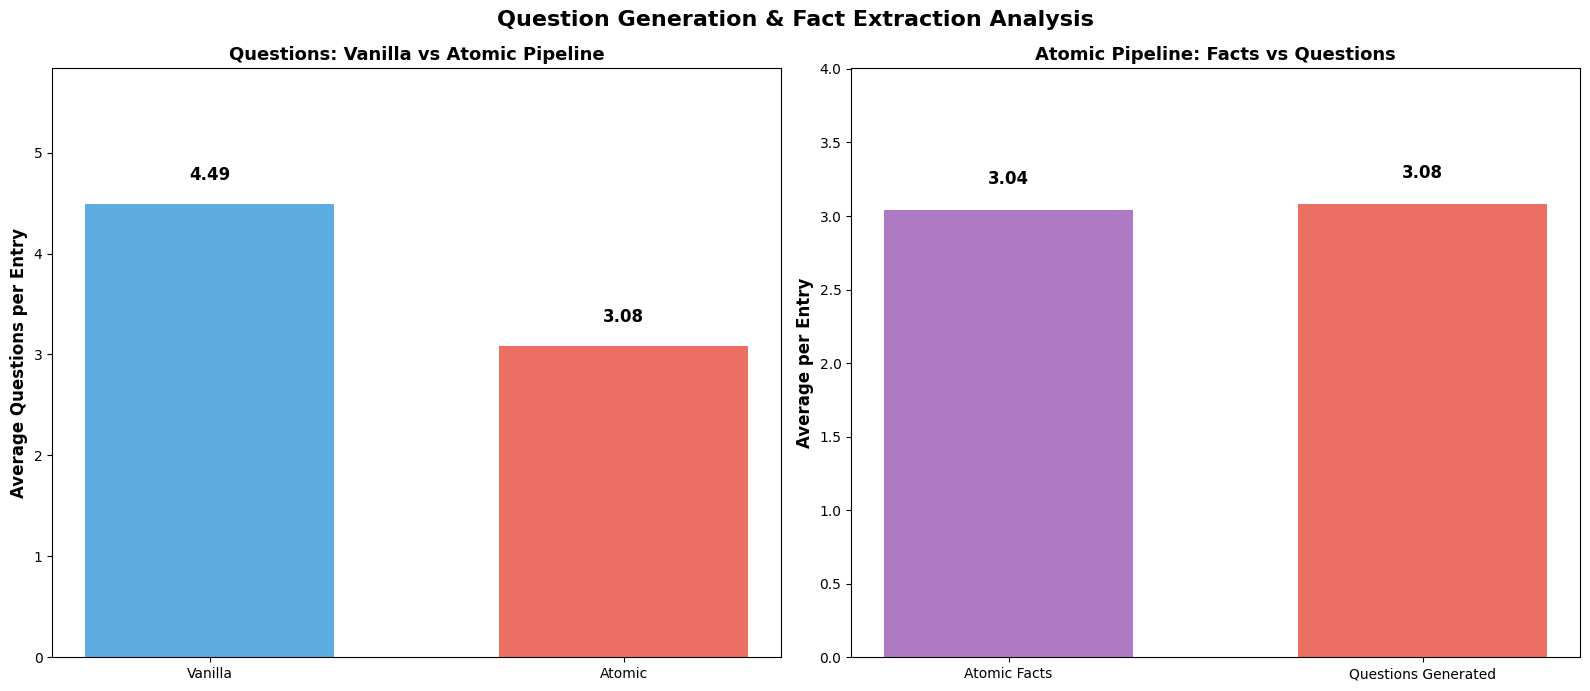

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt

def load_jsonl(filepath):
    """Load JSONL file into list of dictionaries"""
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                data.append(json.loads(line))
    return data

def parse_questions(questions_field):
    """Parse questions field (handle both list and JSON string formats)"""
    if isinstance(questions_field, str):
        try:
            return json.loads(questions_field)
        except:
            return []
    return questions_field if isinstance(questions_field, list) else []

def parse_facts(facts_field):
    """Parse facts field (handle both list and JSON string formats)"""
    if isinstance(facts_field, str):
        try:
            return json.loads(facts_field)
        except:
            return []
    return facts_field if isinstance(facts_field, list) else []

# Load all QG data
vanilla_questions = load_jsonl('/content/CucumBERT_askqe/QG/qwen3-4b/questions-vanilla.jsonl') 
atomic_questions = load_jsonl('/content/CucumBERT_askqe/QG/qwen3-4b/questions-atomic.jsonl')
atomic_facts_data = load_jsonl('/content/CucumBERT_askqe/QG/atomic_facts.jsonl')   
entailed_facts_data = load_jsonl('/content/CucumBERT_askqe/QG/entailed_facts.jsonl')

print("\n" + "="*70)
print("QUESTION GENERATION ANALYSIS — Pipeline Comparison")
print("="*70)

# Analyze questions
vanilla_q_counts = [len(parse_questions(entry.get('questions', []))) for entry in vanilla_questions]
atomic_q_counts = [len(parse_questions(entry.get('questions', []))) for entry in atomic_questions]

avg_vanilla_q = sum(vanilla_q_counts) / len(vanilla_q_counts) if vanilla_q_counts else 0
avg_atomic_q = sum(atomic_q_counts) / len(atomic_q_counts) if atomic_q_counts else 0

print("\n🔴 VANILLA Pipeline Questions:")
print(f"   • Total entries: {len(vanilla_questions)}")
print(f"   • Average questions per entry: {avg_vanilla_q:.2f}")
print(f"   • Min/Max: {min(vanilla_q_counts)}/{max(vanilla_q_counts)}")
print(f"   • Total questions: {sum(vanilla_q_counts)}")

print("\n🔴 ATOMIC Pipeline Questions:")
print(f"   • Total entries: {len(atomic_questions)}")
print(f"   • Average questions per entry: {avg_atomic_q:.2f}")
print(f"   • Min/Max: {min(atomic_q_counts)}/{max(atomic_q_counts)}")
print(f"   • Total questions: {sum(atomic_q_counts)}")

atomic_facts_counts = [len(parse_facts(entry.get('atomic_facts', []))) for entry in atomic_facts_data]
avg_atomic_facts = sum(atomic_facts_counts) / len(atomic_facts_counts) if atomic_facts_counts else 0

print("\n🔵ATOMIC Facts (from atomic_facts.jsonl):")
print(f"   • Total entries: {len(atomic_facts_data)}")
print(f"   • Average facts per entry: {avg_atomic_facts:.2f}")
print(f"   • Min/Max: {min(atomic_facts_counts)}/{max(atomic_facts_counts)}")
print(f"   • Total facts: {sum(atomic_facts_counts)}")

entailed_facts_counts = [len(parse_facts(entry.get('atomic_facts', []))) for entry in entailed_facts_data]
avg_entailed_facts = sum(entailed_facts_counts) / len(entailed_facts_counts) if entailed_facts_counts else 0

print("\n🔵 ENTAILED Facts (from entailed_facts.jsonl):")
print(f"   • Total entries: {len(entailed_facts_data)}")
print(f"   • Average entailed facts per entry: {avg_entailed_facts:.2f}")
print(f"   • Min/Max: {min(entailed_facts_counts)}/{max(entailed_facts_counts)}")
print(f"   • Total entailed facts: {sum(entailed_facts_counts)}")

print("\n" + "="*70)
print("KEY INSIGHTS:")
print(f"   • Atomic generates {avg_atomic_q/avg_vanilla_q:.2f}x more questions than Vanilla")
print(f"   • Average facts-to-questions ratio: {avg_atomic_facts/avg_atomic_q:.2f}")
print(f"   • Entailed facts are {avg_entailed_facts/avg_atomic_facts:.2f}x more than atomic facts")
print("="*70 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Question Generation & Fact Extraction Analysis', fontsize=16, fontweight='bold')

# Chart 1: Questions comparison (Vanilla vs Atomic)
ax1 = axes[0]
pipelines = ['Vanilla', 'Atomic']
q_avgs = [avg_vanilla_q, avg_atomic_q]
colors = ['#3498db', '#e74c3c']
bars1 = ax1.bar(pipelines, q_avgs, color=colors, alpha=0.8, width=0.6)
ax1.set_ylabel('Average Questions per Entry', fontsize=12, fontweight='bold')
ax1.set_title('Questions: Vanilla vs Atomic Pipeline', fontsize=13, fontweight='bold')
ax1.set_ylim(0, max(q_avgs) * 1.3)
for bar, val in zip(bars1, q_avgs):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 0.2, f'{val:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Chart 2: Facts vs Questions in Atomic Pipeline
ax2 = axes[1]
categories = ['Atomic Facts', 'Questions Generated']
values = [avg_atomic_facts, avg_atomic_q]
colors_atomic = ['#9b59b6', '#e74c3c']
bars2 = ax2.bar(categories, values, color=colors_atomic, alpha=0.8, width=0.6)
ax2.set_ylabel('Average per Entry', fontsize=12, fontweight='bold')
ax2.set_title('Atomic Pipeline: Facts vs Questions', fontsize=13, fontweight='bold')
ax2.set_ylim(0, max(values) * 1.3)
for bar, val in zip(bars2, values):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 0.15, f'{val:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.1 String Comparison Analysis

**String-based metrics** evaluate translation quality by comparing the generated questions against reference questions through surface-level similarity:

- **F1 Score**: Harmonic mean of precision and recall at token level — balances completeness and accuracy
- **BLEU**: Measures n-gram overlap between candidate and reference — sensitive to word order
- **chrF**: Character-level F-score — more robust to morphological variations

**Key Question**: How do vanilla and atomic pipelines perform across different perturbation types? This reveals pipeline robustness to translation errors.

Loaded average scores from string-comparison data:
Perturbation  Vanilla_F1  Vanilla_chrF  Vanilla_BLEU  Atomic_F1  Atomic_chrF  Atomic_BLEU
  Alteration    0.522889     56.884840     38.038398   0.444207    47.621813    34.996420
     Synonym    0.662469     69.022490     51.896222   0.766950    79.093636    67.231994
   Expansion    0.673624     71.506619     50.484384   0.789913    81.903724    68.047587
    Omission    0.590091     60.782069     42.973268   0.673280    69.109798    56.472240


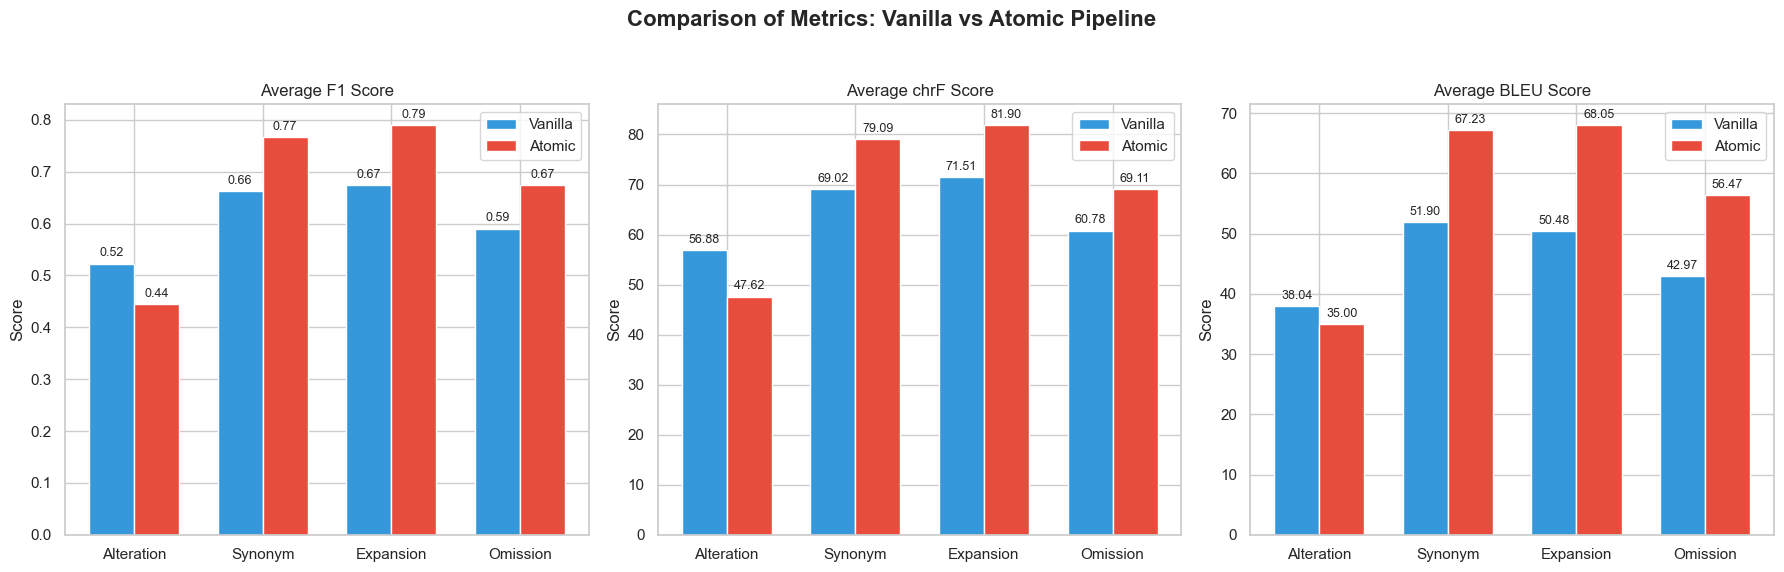

In [ ]:
# Load data from string-comparison results
from pathlib import Path
import numpy as np
import pandas as pd

def load_string_comparison_data(pipeline, perturbation):
    """Load average scores from string-comparison JSONL files"""
    base_path = Path('/content/CucumBERT_askqe/evaluation/string-comparison/en-es') 
    file_path = base_path / pipeline / f"{perturbation}.jsonl"

    scores = {'f1': [], 'chrf': [], 'bleu': []}

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                entry = json.loads(line)
                scores['f1'].append(entry['avg_f1'])
                scores['chrf'].append(entry['avg_chrf'])
                scores['bleu'].append(entry['avg_bleu'])

        # Calculate average across all entries
        avg_scores = {
            'f1': sum(scores['f1']) / len(scores['f1']) if scores['f1'] else 0,
            'chrf': sum(scores['chrf']) / len(scores['chrf']) if scores['chrf'] else 0,
            'bleu': sum(scores['bleu']) / len(scores['bleu']) if scores['bleu'] else 0
        }
        return avg_scores
    except FileNotFoundError:
        print(f"Warning: File not found - {file_path}")
        return {'f1': 0, 'chrf': 0, 'bleu': 0}

# Load data for all perturbations and pipelines
perturbations = ['alteration', 'synonym', 'expansion_noimpact', 'omission']
perturbation_labels = ['Alteration', 'Synonym', 'Expansion', 'Omission']

data = {'Perturbation': perturbation_labels}

for pipeline in ['vanilla', 'atomic']:
    f1_scores = []
    chrf_scores = []
    bleu_scores = []

    for pert in perturbations:
        scores = load_string_comparison_data(pipeline, pert)
        f1_scores.append(scores['f1'])
        chrf_scores.append(scores['chrf'])
        bleu_scores.append(scores['bleu'])

    data[f'{pipeline.capitalize()}_F1'] = f1_scores
    data[f'{pipeline.capitalize()}_chrF'] = chrf_scores
    data[f'{pipeline.capitalize()}_BLEU'] = bleu_scores

df = pd.DataFrame(data)

print("Loaded average scores from string-comparison data:")
print(df.to_string(index=False))

# Setting up the figure with 3 subplots for F1, chrF, and BLEU
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparison of Metrics: Vanilla vs Atomic Pipeline', fontsize=16, fontweight='bold')

metrics = ['F1', 'chrF', 'BLEU']
colors = ['#3498db', '#e74c3c'] # Blue for Vanilla, Red for Atomic

x = np.arange(len(df['Perturbation']))
width = 0.35

for i, metric in enumerate(metrics):
    vanilla_col = f'Vanilla_{metric}'
    atomic_col = f'Atomic_{metric}'

    rects1 = axes[i].bar(x - width/2, df[vanilla_col], width, label='Vanilla', color=colors[0])
    rects2 = axes[i].bar(x + width/2, df[atomic_col], width, label='Atomic', color=colors[1])

    axes[i].set_title(f'Average {metric} Score')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(df['Perturbation'])
    axes[i].set_ylabel('Score')
    axes[i].legend()

    # Add values on top of bars
    def autolabel(rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    autolabel(rects1, axes[i])
    autolabel(rects2, axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('vanilla_vs_atomic_metrics.png')
plt.show()

### 2.2 Pearson Correlation Analysis

The **Pearson correlation coefficient** (r) measures the linear relationship between AskQE metrics and standard MT metrics:

- **r > 0.7**: Strong positive correlation — metrics agree well
- **r = 0.4-0.7**: Moderate correlation — some agreement
- **r < 0.4**: Weak correlation — metrics measure different aspects

**Key Question**: Do AskQE metrics correlate with established MT quality metrics? If yes, AskQE captures similar quality dimensions.

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load Pearson correlation results
pearson_path = '/content/CucumBERT_askqe/evaluation/pearson-correlation/results_en-es.json' 
with open(pearson_path, 'r') as f:
    pearson_data = json.load(f)

# Extract correlations into a dataframe for easier manipulation
correlations = pearson_data['correlations']
df_corr = pd.DataFrame(correlations)

# Filter to get only correlations with standard metrics
df_xcomet = df_corr[df_corr['standard_metric'] == 'xcomet'].copy()
df_bertscore = df_corr[df_corr['standard_metric'] == 'bt_score'].copy()

print("Sample Pearson Correlations:")
print(df_xcomet.head())
print(f"\nTotal correlations: {len(df_corr)}")


Sample Pearson Correlations:
   askqe_metric standard_metric  n_instances  pearson_r       p_value
0    f1-vanilla          xcomet         1972   0.362619  2.430083e-62
2     f1-atomic          xcomet         1924   0.391457  1.755126e-71
4    em-vanilla          xcomet         1972   0.167098  8.128991e-14
6     em-atomic          xcomet         1924   0.279253  8.429096e-36
8  bleu-vanilla          xcomet         1972   0.287736  6.668610e-39

Total correlations: 20


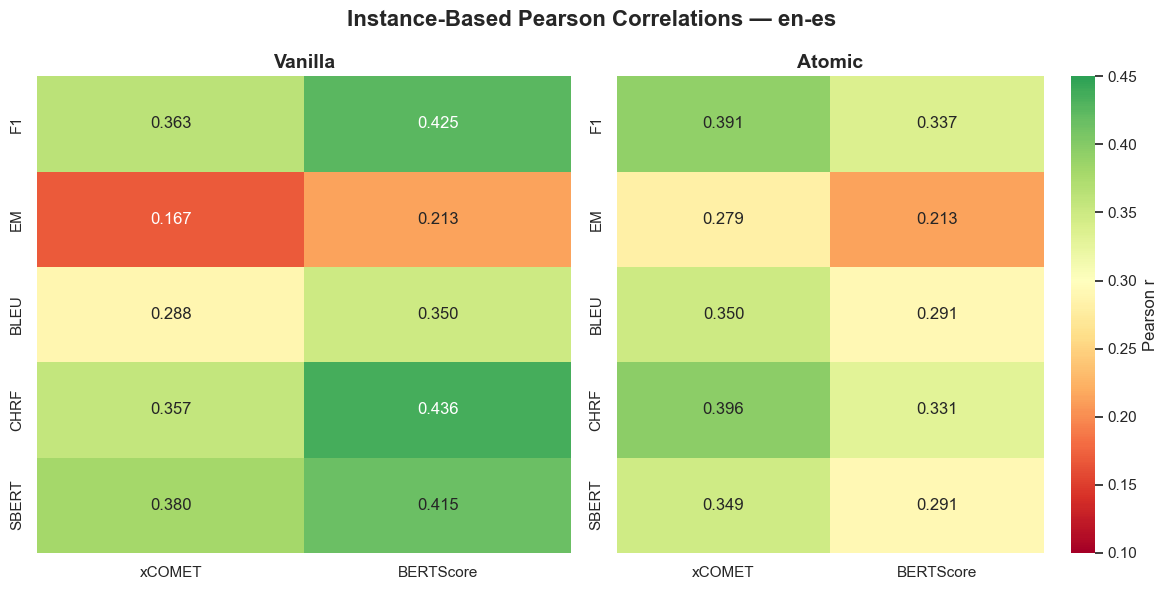

In [11]:
# Create side-by-side heatmaps for Vanilla and Atomic pipelines
import numpy as np

# Add pipeline column
df_corr['pipeline'] = df_corr['askqe_metric'].apply(lambda x: x.split('-')[1] if '-' in x else 'unknown')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Instance-Based Pearson Correlations — en-es', fontsize=16, fontweight='bold')

pipelines = ['vanilla', 'atomic']

for idx, pipeline in enumerate(pipelines):
    # Filter data for this pipeline
    df_pipeline = df_corr[df_corr['pipeline'] == pipeline].copy()

    # Extract metric base name (remove pipeline suffix)
    df_pipeline['metric_base'] = df_pipeline['askqe_metric'].str.replace(f'-{pipeline}', '')

    # Create pivot table
    corr_pivot = df_pipeline.pivot_table(
        index='metric_base',
        columns='standard_metric',
        values='pearson_r'
    )

    # Rename columns and reorder
    corr_pivot.columns = ['BERTScore', 'xCOMET']
    corr_pivot = corr_pivot[['xCOMET', 'BERTScore']]  # xCOMET first

    # Reorder rows in specified order
    metric_order = ['f1', 'em', 'bleu', 'chrf', 'sbert']
    corr_pivot = corr_pivot.reindex([m for m in metric_order if m in corr_pivot.index])

    # Uppercase row labels
    corr_pivot.index = [m.upper() for m in corr_pivot.index]

    # Create heatmap
    sns.heatmap(corr_pivot, annot=True, fmt='.3f', cmap='RdYlGn',
                center=0.3, cbar=(idx == 1),  # Only rightmost has colorbar
                cbar_kws={'label': 'Pearson r'} if idx == 1 else {},
                ax=axes[idx], vmin=0.1, vmax=0.45)

    axes[idx].set_title(pipeline.capitalize(), fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('', fontsize=11) if idx == 1 else axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()


### 2.3 Silhouette Score Analysis

The **Silhouette score** measures how well a metric separates critical perturbations from minimal ones:

- **Score = 1**: Perfect separation — metric clearly distinguishes error types
- **Score = 0**: No separation — metric cannot differentiate quality levels
- **Score = -1**: Inverted clusters — metric behaves opposite to expected

**Interpretation**:
- **High silhouette** → Metric is sensitive to quality degradation
- **Low silhouette** → Metric cannot reliably detect translation errors

**Key Question**: Can AskQE metrics distinguish between critical and minimal perturbations? This tests the metric's discriminative power in the legal domain.

In [ ]:
# Load Silhouette results
silhouette_path = '/content/CucumBERT_askqe/evaluation/silhouette/results_en-es.json'  
with open(silhouette_path, 'r') as f:
    silhouette_data = json.load(f)

# Parse silhouette results
sil_results = []
for result in silhouette_data['results']:
    pipeline = result['pipeline']
    for metric, values in result['metrics'].items():
        sil_results.append({
            'pipeline': pipeline,
            'metric': metric,
            'silhouette_score': values['silhouette_score'],
            'n_samples': values['n_samples']
        })

# Add MT metrics
for metric, values in silhouette_data['mt_results'].items():
    sil_results.append({
        'pipeline': 'mt',
        'metric': metric,
        'silhouette_score': values['silhouette_score'],
        'n_samples': values['n_samples']
    })

df_sil = pd.DataFrame(sil_results)

print("Silhouette Score Data:")
print(df_sil.to_string())
print(f"\nCritical perturbations: {silhouette_data['critical_perturbations']}")
print(f"Minimal perturbations: {silhouette_data['minimal_perturbations']}")


Silhouette Score Data:
   pipeline     metric  silhouette_score  n_samples
0   vanilla      sbert          0.064056       1972
1   vanilla         f1          0.045316       1972
2   vanilla         em          0.015480       1972
3   vanilla       chrf          0.055698       1972
4   vanilla       bleu          0.032549       1972
5    atomic      sbert          0.101034       1924
6    atomic         f1          0.116106       1924
7    atomic         em          0.072104       1924
8    atomic       chrf          0.127250       1924
9    atomic       bleu          0.094574       1924
10       mt     xcomet          0.204190       2000
11       mt  bertscore          0.096313       2000

Critical perturbations: ['omission', 'alteration']
Minimal perturbations: ['synonym', 'expansion_noimpact']


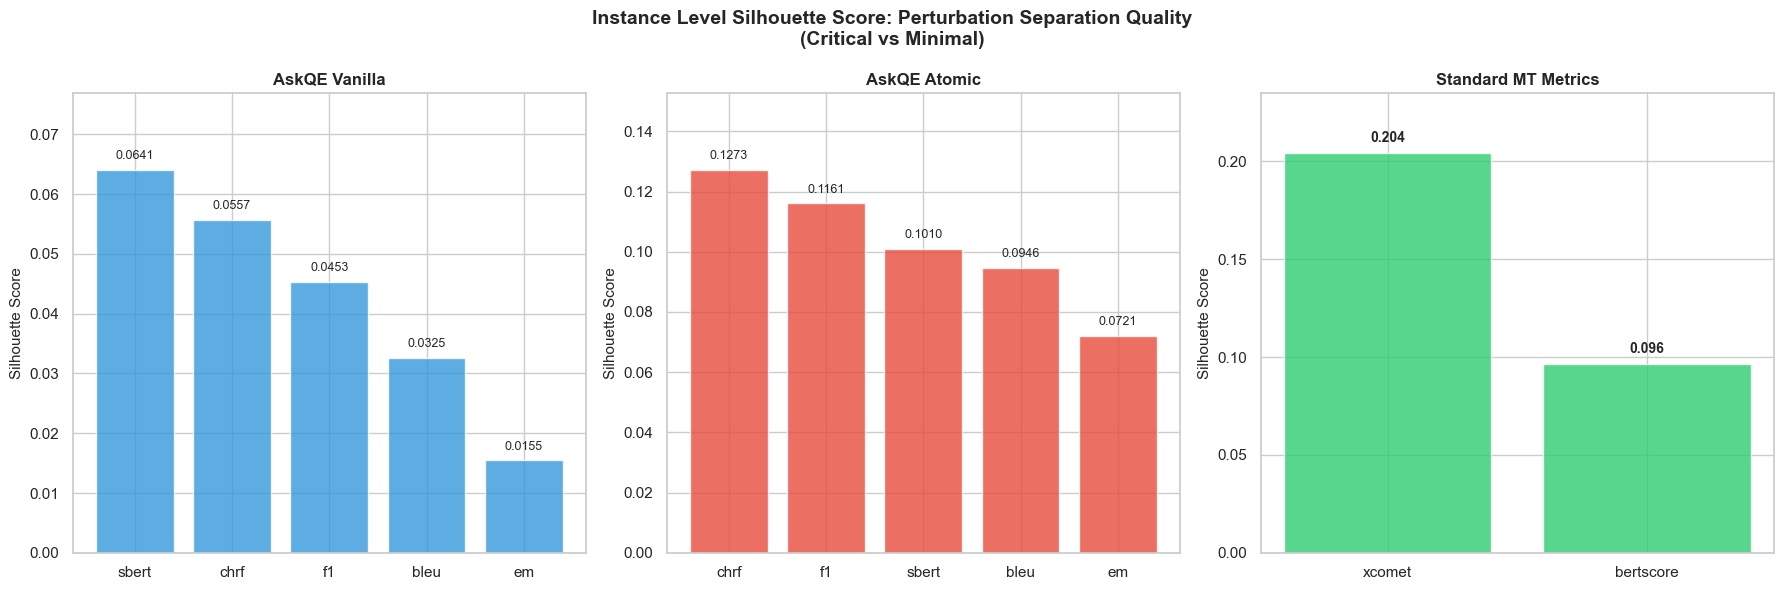

In [14]:
# Visualization 1: Silhouette comparison across metrics and pipelines
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Instance Level Silhouette Score: Perturbation Separation Quality\n(Critical vs Minimal)',
             fontsize=14, fontweight='bold')

# AskQE Vanilla metrics
vanilla_data = df_sil[df_sil['pipeline'] == 'vanilla'].copy()
vanilla_data = vanilla_data.sort_values('silhouette_score', ascending=False)

axes[0].bar(range(len(vanilla_data)), vanilla_data['silhouette_score'], color='#3498db', alpha=0.8)
axes[0].set_xticks(range(len(vanilla_data)))
axes[0].set_xticklabels(vanilla_data['metric'], fontsize=11)
axes[0].set_ylabel('Silhouette Score', fontsize=11)
axes[0].set_title('AskQE Vanilla', fontsize=12, fontweight='bold')
max_vanilla = vanilla_data['silhouette_score'].max()
axes[0].set_ylim(0, max_vanilla * 1.2)

# Add value labels
for i, (idx, row) in enumerate(vanilla_data.iterrows()):
    axes[0].text(i, row['silhouette_score'] + max_vanilla * 0.02, f"{row['silhouette_score']:.4f}",
                ha='center', va='bottom', fontsize=9)

# AskQE Atomic metrics
atomic_data = df_sil[df_sil['pipeline'] == 'atomic'].copy()
atomic_data = atomic_data.sort_values('silhouette_score', ascending=False)

axes[1].bar(range(len(atomic_data)), atomic_data['silhouette_score'], color='#e74c3c', alpha=0.8)
axes[1].set_xticks(range(len(atomic_data)))
axes[1].set_xticklabels(atomic_data['metric'], fontsize=11)
axes[1].set_ylabel('Silhouette Score', fontsize=11)
axes[1].set_title('AskQE Atomic', fontsize=12, fontweight='bold')
max_atomic = atomic_data['silhouette_score'].max()
axes[1].set_ylim(0, max_atomic * 1.2)

# Add value labels
for i, (idx, row) in enumerate(atomic_data.iterrows()):
    axes[1].text(i, row['silhouette_score'] + max_atomic * 0.02, f"{row['silhouette_score']:.4f}",
                ha='center', va='bottom', fontsize=9)

# MT metrics
mt_data = df_sil[df_sil['pipeline'] == 'mt'].copy()
mt_data = mt_data.sort_values('silhouette_score', ascending=False)

axes[2].bar(range(len(mt_data)), mt_data['silhouette_score'], color='#2ecc71', alpha=0.8)
axes[2].set_xticks(range(len(mt_data)))
axes[2].set_xticklabels(mt_data['metric'], fontsize=11)
axes[2].set_ylabel('Silhouette Score', fontsize=11)
axes[2].set_title('Standard MT Metrics', fontsize=12, fontweight='bold')
max_mt = mt_data['silhouette_score'].max()
axes[2].set_ylim(0, max_mt * 1.15)

# Add value labels
for i, (idx, row) in enumerate(mt_data.iterrows()):
    axes[2].text(i, row['silhouette_score'] + max_mt * 0.02, f"{row['silhouette_score']:.3f}",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()